In [15]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv



In [16]:

def compute_histogram(image, number_bins=256):

    image_height = image.shape[0]
    image_width = image.shape[1]
    histogram = np.zeros([number_bins], np.uint16)

    for x in range(0, image_height):
        for y in range(0, image_width):
            histogram[image[x,y]] +=1

    return histogram

def plot_histogram(histogram , name):
    plt.figure()
    plt.title("Gray Image Histogram")
    plt.xlabel("Intensity Level")
    plt.ylabel("Intensity Frequency")
    plt.xlim([0, 256])
    plt.plot(histogram[:]) 
    plt.savefig(name)
    plt.show();



In [17]:
def image_histogram_equalization(image, number_bins=256):
    # get image histogram
    image_histogram = compute_histogram(image)
    cdf = image_histogram.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize
    cdf = cdf.astype(np.uint8)
    flatten_img = image.flatten()
    image_equalized = np.fromiter((cdf[xi] for xi in flatten_img), flatten_img.dtype)

    return image_equalized.reshape(image.shape)


In [18]:
def local_image_histogram_equalization(image , segment_count):  
    # segment_count variable determines how many segments input image will be divided to on each axis
    
    segment_height = int(image.shape[0]/segment_count)
    segment_width = int(image.shape[1]/segment_count)
    result = np.zeros(image.shape, dtype=int)
    for i in range(segment_count):
        for j in range(segment_count):
            segment = image[i*segment_height:(i+1)*segment_height ,j*segment_width:(j+1)*segment_width]
            equilized_segment = image_histogram_equalization(segment)
            result[i*segment_height:(i+1)*segment_height ,j*segment_width:(j+1)*segment_width] = equilized_segment
    return result

def their_local_image_histogram_equalization(image , window_radius=5):
    def get_equalized_center_pixel_value(neighborhood):
#         print(neighborhood)
#         print(neighborhood.shape)
        neighborhood_histogram = cv.calcHist([neighborhood ],[0],None,[256],[0,256]).astype(np.uint16).flatten()
        cdf = neighborhood_histogram.cumsum() # cumulative distribution function
        cdf = 255 * cdf / cdf[-1] # normalize
        cdf = cdf.astype(np.uint8)
#         print(cdf)
        result = cdf[neighborhood[int(neighborhood.shape[0]/2) , int(neighborhood.shape[1]/2)]]
#         print(result)
        return result
        
    temp = np.zeros((image.shape[0]+2*window_radius , image.shape[1]+2*window_radius) , dtype=np.uint8)
    temp[window_radius:window_radius+image.shape[0] , window_radius:window_radius + image.shape[1] ] = image
    result = np.zeros(image.shape,dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i,j] = get_equalized_center_pixel_value(temp[i:i+window_radius*2+1 , j:j+window_radius*2+1])
    
    
    return result

In [19]:
# for i in range(1,2):
#     im_raw = cv.imread(f'../Images/2/HE{i}.jpg', cv.IMREAD_GRAYSCALE)
#     windows_radius = 11
#     locally_equalized = their_local_image_histogram_equalization(im_raw , windows_radius)
#     plt.figure()
#     plt.imshow(locally_equalized)
#     cv.imwrite(f'HE{i}_their_{windows_radius}_equalized.jpg', locally_equalized) 

True

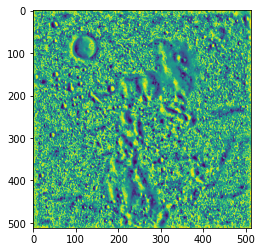

In [7]:
im_raw = cv.imread(f'gmoo2.jpg', cv.IMREAD_GRAYSCALE)
windows_radius = radius
locally_equalized = their_local_image_histogram_equalization(im_raw , windows_radius)
plt.figure()
plt.imshow(locally_equalized)
cv.imwrite(f'moo2_their_{windows_radius}_equalized.jpg', locally_equalized) 

In [ ]:
# import threading
# import time

# exitFlag = 0

# class myThread (threading.Thread):
#     def __init__(self, threadID, name, windows_radius):
#         threading.Thread.__init__(self)
#         self.threadID = threadID
#         self.name = name
#         self.windows_radius = windows_radius
#     def run(self):
#         print ("Starting " + self.name)
#         print_time(self.name, self.windows_radius)
#         print ("Exiting " + self.name)

# def print_time(threadName, radius):
#     im_raw = cv.imread(f'gmoo2.jpg', cv.IMREAD_GRAYSCALE)
#     windows_radius = radius
#     locally_equalized = their_local_image_histogram_equalization(im_raw , windows_radius)
#     plt.figure()
#     plt.imshow(locally_equalized)
#     cv.imwrite(f'moo2_their_{windows_radius}_equalized.jpg', locally_equalized) 

# # Create new threads
# thread1 = myThread(1, "Thread-1", 17)
# thread2 = myThread(2, "Thread-2", 19)
# thread3 = myThread(3, "Thread-3", 21)
# thread4 = myThread(3, "Thread-4", 23)
# # Start new Threads
# thread1.start()
# thread2.start()
# thread3.start()
# thread4.start()
# thread1.join()
# thread2.join()
# thread3.join()
# thread4.join()
# print ("Exiting Main Thread")

Starting Thread-1
Starting Thread-2
Starting Thread-3
Starting Thread-4


Wall time: 17.1 s


True

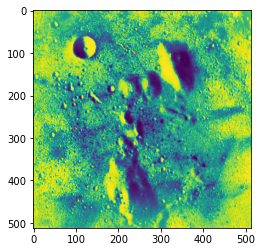

In [20]:

im_raw = cv.imread(f'gmoo2.jpg', cv.IMREAD_GRAYSCALE)
windows_radius = 101
%time locally_equalized = their_local_image_histogram_equalization(im_raw , windows_radius)
plt.figure()
plt.imshow(locally_equalized)
cv.imwrite(f'moo2_their_{windows_radius}_equalized.jpg', locally_equalized) 